In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Features engieneering

In [17]:
users = pd.read_csv('../data/train_users_2.csv')
test_users = pd.read_csv('../data/test_users.csv')
sessions = pd.read_csv('../data/sessions.csv')
ages = pd.read_csv('../data/age_gender_bkts.csv')
countries = pd.read_csv('../data/countries.csv')
user_ids = set(sessions.user_id.values).intersection(users.id.values)

In [18]:
users['target'] = users.apply(lambda r: 1 if r['country_destination'] != 'NDF' else 0, axis=1)

In [19]:
data = pd.concat([users[users['target'] == 1].head(88000), users[users['target'] == 0].head(88000)])
data

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,target
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,1
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,1
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,1
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US,1
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154116,6mvrjolxfk,2014-02-18,20140218055331,NaN,-unknown-,NaN,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,NDF,0
154118,acdq94b5oo,2014-02-18,20140218055604,NaN,-unknown-,NaN,basic,0,en,sem-non-brand,google,omg,Web,iPad,Chrome Mobile,NDF,0
154119,pcqkta8etp,2014-02-18,20140218055939,NaN,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF,0
154121,ykxgog2ws0,2014-02-18,20140218060032,NaN,MALE,29.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,0


In [20]:
data['null_age'] = data['age'].isnull().astype(int)
data['age_correct'] = ((0 < data['age']) & (data['age'] < 100)).astype(int)
data['age_100'] = ((100 < data['age']) & (data['age'] < 2000)).astype(int)

In [21]:
data['gender_unknown'] = (data['gender'] == '-unknown-').astype(int)

In [22]:
data['aff_channel_api'] = (data['affiliate_channel'] == 'api').astype(int)
data['aff_channel_content'] = (data['affiliate_channel'] == 'content').astype(int)
data['aff_channel_other'] = (data['affiliate_channel'] == 'other').astype(int)

In [23]:
data['first_dev_type_mac'] = (data['first_device_type'] == 'Mac').astype(int)
data['first_dev_type_unknown'] = (data['first_device_type'] == 'Other/Unknown').astype(int)

In [24]:
data

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,target,null_age,age_correct,age_100,gender_unknown,aff_channel_api,aff_channel_content,aff_channel_other,first_dev_type_mac,first_dev_type_unknown
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,1,0,1,0,0,0,0,0,0,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,1,0,1,0,0,0,0,0,0,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,...,1,0,1,0,1,0,0,0,0,0
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,...,1,1,0,0,1,0,0,1,0,0
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154116,6mvrjolxfk,2014-02-18,20140218055331,NaN,-unknown-,NaN,basic,0,en,direct,...,0,1,0,0,1,0,0,0,0,0
154118,acdq94b5oo,2014-02-18,20140218055604,NaN,-unknown-,NaN,basic,0,en,sem-non-brand,...,0,1,0,0,1,0,0,0,0,0
154119,pcqkta8etp,2014-02-18,20140218055939,NaN,-unknown-,NaN,basic,25,en,direct,...,0,1,0,0,1,0,0,0,0,0
154121,ykxgog2ws0,2014-02-18,20140218060032,NaN,MALE,29.0,basic,0,en,direct,...,0,0,1,0,0,0,0,0,0,0


In [25]:
data = data.sample(frac=1)

In [26]:
n = int(data.shape[0] * 0.7)
matrix_data = data.loc[:, 'null_age':].values

X_train = matrix_data[:n, :]
y_train = data['target'].values[:n]

X_test = matrix_data[n:, :]
y_test = data['target'].values[n:]

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6540595822048825

In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=10)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6584344993466033

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.657904206359728

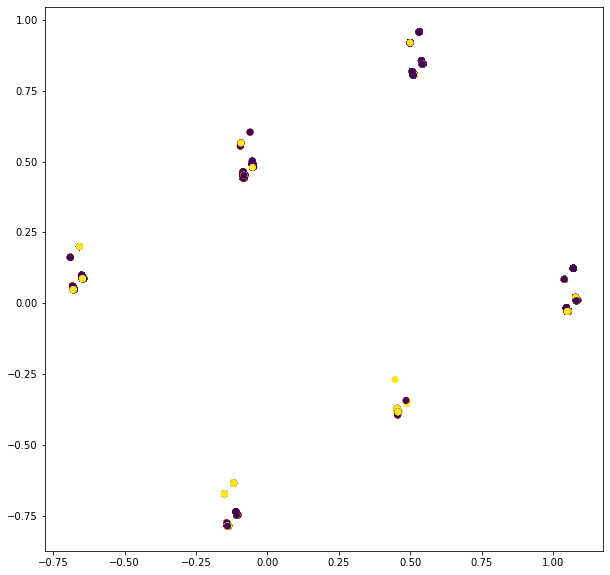

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
toplot = pca.fit_transform(matrix_data)

plt.figure(figsize=(10, 10))
plt.scatter(toplot[:,0], toplot[:,1], c=data['target'].values)